In [312]:
!pip install pyspark
!wget -q https://downloads.apache.org/spark/spark-3.0.1/spark-3.0.1-bin-hadoop3.2.tgz
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from pyspark.sql import SparkSession
from pyspark.sql.functions import count
from pyspark.sql.functions import col, isnan, when, count, lit

import DataInit

# Get data from DataInit file
data_frame = DataInit.get_data_frame()
data_frame.show()
data = data_frame.toPandas()

# Start EDA
print("*** Started Exploratory Data Analysis ***")

print("Show summary")
data_frame.summary().show()
print("Show inconsistent data (i.e null, nan, etc.)")
data_frame.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in data_frame.columns]).show()
print("Rows with 'gender' == Other: ")
print(data_frame.where(data_frame.gender == 'Other').count())
print("Rows with 'smoking_status' == Unknown: ")
print(data_frame.where(data_frame.smoking_status == 'Unknown').count())
print("*** Finished Exploratory Data Analysis ***")

# Show EDA plots

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
| 9046|  Male|67.0|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|formerly smoked|     1|
|51676|Female|61.0|           0|            0|         Yes|Self-employed|         Rural|           202.21| N/A|   never smoked|     1|
|31112|  Male|80.0|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|   never smoked|     1|
|60182|Female|49.0|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|         smokes|     1|
| 1665|Female|79.0|           1|            0|         

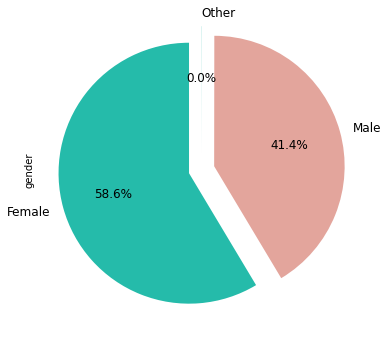

In [ ]:
data = data_frame.toPandas()
data['gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, explode=[0.1, 0.1, 0.1], figsize=(9,6), colors = ['#25BBAA', '#e3a59c'], textprops={'fontsize': 12})


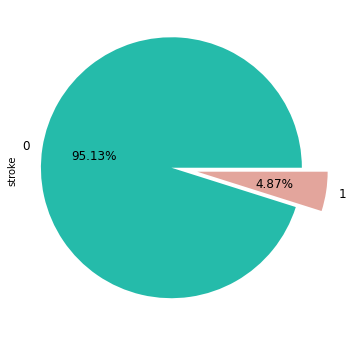

In [ ]:
data = data_frame.toPandas()
data['stroke'].value_counts().plot.pie(autopct='%1.2f%%', explode=[0.1, 0.1], figsize=(9,6), colors = ['#25BBAA', '#e3a59c'], textprops={'fontsize': 12})


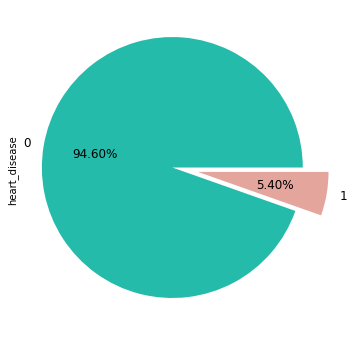

In [ ]:
data = data_frame.toPandas()
data['heart_disease'].value_counts().plot.pie(autopct='%1.2f%%', explode=[0.1, 0.1], figsize=(9,6), colors = ['#25BBAA', '#e3a59c'], textprops={'fontsize': 12})


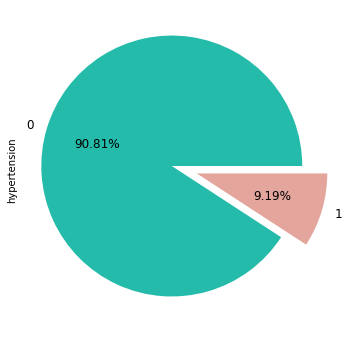

In [ ]:
data = data_frame.toPandas()
data['hypertension'].value_counts().plot.pie(autopct='%1.2f%%', explode=[0.1, 0.1], figsize=(9,6), colors = ['#25BBAA', '#e3a59c'], textprops={'fontsize': 12})

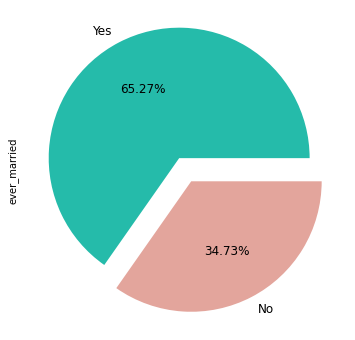

In [ ]:
data = data_frame.toPandas()
data['ever_married'].value_counts().plot.pie(autopct='%1.2f%%', explode=[0.1, 0.1], figsize=(9,6), colors = ['#25BBAA', '#e3a59c'], textprops={'fontsize': 12})

[Text(0, 0, 'Private'),
 Text(0, 0, 'Self-employed'),
 Text(0, 0, 'Govt_job'),
 Text(0, 0, 'children'),
 Text(0, 0, 'Never_worked')]

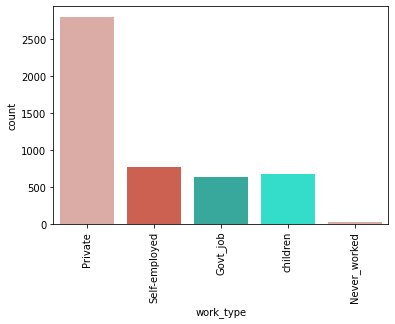

In [ ]:
data = data_frame.toPandas()
chart = sns.countplot(x='work_type', data=data, palette=('#e3a59c','#E1503C','#25BBAA', '#17F9DF'))
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

[Text(0, 0, 'Urban'), Text(0, 0, 'Rural')]

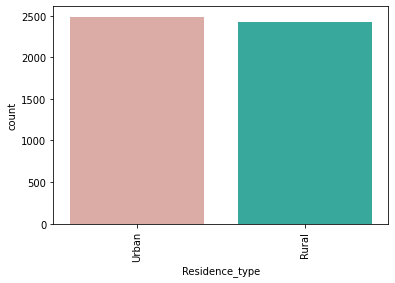

In [ ]:
data = data_frame.toPandas()
chart = sns.countplot(x='Residence_type', data=data, palette=('#e3a59c','#25BBAA'))
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)


In [310]:
data_frame = DataInit.data_cleaning(data_frame)

***Cleaning the dataset***:
+-----+------+----+------------+-------------+------------+---------+--------------+-----------------+----+---------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+----+------------+-------------+------------+---------+--------------+-----------------+----+---------------+------+
|56156| Other|26.0|           0|            0|          No|  Private|         Rural|           143.33|22.4|formerly smoked|     0|
+-----+------+----+------------+-------------+------------+---------+--------------+-----------------+----+---------------+------+

+------+-----+
|gender|count|
+------+-----+
|Female| 2158|
|  Male| 1407|
+------+-----+

***Finished cleaning the dataset***:


Text(1, 0.045, 'Age and Stroke distribution')

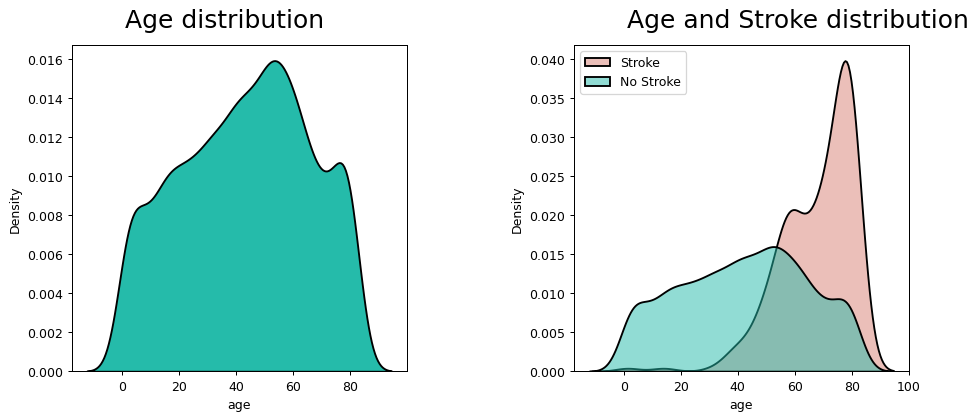

In [313]:
data = data_frame.toPandas()
data_age = data['age']
data_stroke = data['stroke'] == 1
data_non_stroke = data['stroke'] == 0

fig = plt.figure(figsize=(12, 12), dpi=90)
gs = fig.add_gridspec(2,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

sns.kdeplot(ax=ax0, data=data_age, color='#25BBAA', shade=True, linewidth=1.5, ec='black',alpha=1)
sns.kdeplot(ax=ax1, x=data.loc[data_stroke]['age'], shade=True, color='#e3a59c',label='Stroke', linewidth=1.5, ec='black',alpha=0.7)
sns.kdeplot(ax=ax1,x=data.loc[data_non_stroke]['age'],color='#25BBAA',label='No Stroke',shade=True, linewidth=1.5, ec='black',alpha=0.5)
ax1.legend(loc = 'upper left')
ax0.text(1,0.018,'Age distribution',fontsize = 20,fontfamily='Arial', verticalalignment = 'center')
ax1.text(1,0.045,'Age and Stroke distribution',fontsize = 20,fontfamily='Arial', verticalalignment = 'center')

0       228.69
1       202.21
2       105.92
3       171.23
4       174.12
         ...  
5105     83.75
5106    125.20
5107     82.99
5108    166.29
5109     85.28
Name: avg_glucose_level, Length: 5110, dtype: float64


Text(1, 0.018, 'Avg_glucose_level and Stroke distribution')

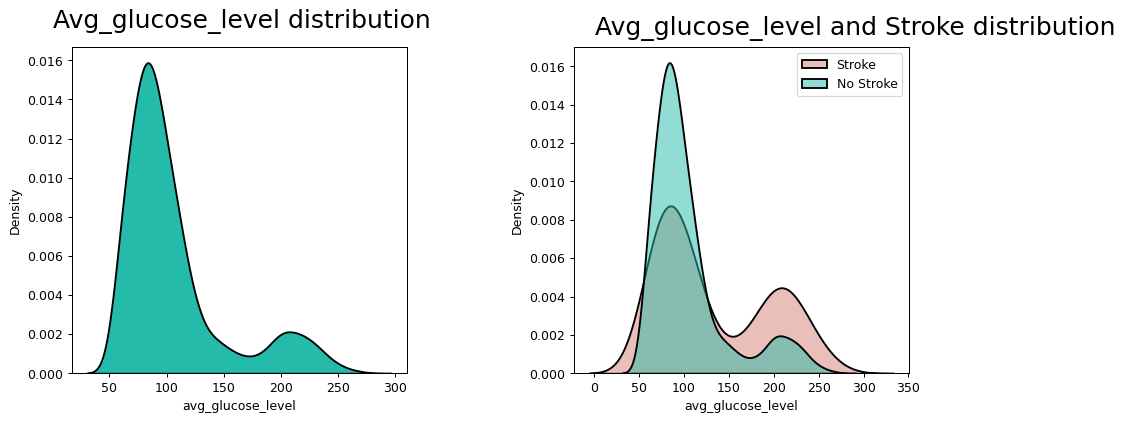

In [ ]:
data = data_frame.toPandas()
data_glucose = data['avg_glucose_level']
data_stroke = data['stroke'] == 1
data_non_stroke = data['stroke'] == 0

fig = plt.figure(figsize=(12, 12), dpi=90)
gs = fig.add_gridspec(2,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

sns.kdeplot(ax=ax0, data=data_glucose, color='#25BBAA', shade=True, linewidth=1.5, ec='black',alpha=1)
sns.kdeplot(ax=ax1, x=data.loc[data_stroke]['avg_glucose_level'], shade=True, color='#e3a59c',label='Stroke', linewidth=1.5, ec='black',alpha=0.7)
sns.kdeplot(ax=ax1,x=data.loc[data_non_stroke]['avg_glucose_level'],color='#25BBAA',label='No Stroke',shade=True, linewidth=1.5, ec='black',alpha=0.5)
ax1.legend(loc = 'upper right')
ax0.text(1,0.018,'Avg_glucose_level distribution',fontsize = 20,fontfamily='Arial', verticalalignment = 'center')
ax1.text(1,0.018,'Avg_glucose_level and Stroke distribution',fontsize = 20,fontfamily='Arial', verticalalignment = 'center')

Text(1, 0.08, 'Bmi and Stroke distribution')

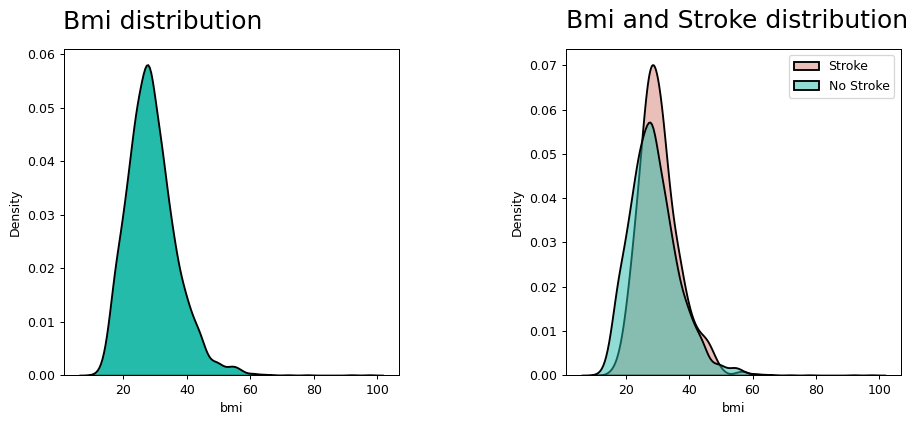

In [ ]:
data_frame= data_frame.filter(data_frame.bmi != 'N/A')
data = data_frame.toPandas()

# Convert from object to numeric type
data["bmi"] = pd.to_numeric(data["bmi"])

data_bmi = data['bmi']
data_stroke = data['stroke'] == 1
data_non_stroke = data['stroke'] == 0

fig = plt.figure(figsize=(12, 12), dpi=90)
gs = fig.add_gridspec(2,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

sns.kdeplot(ax=ax0, data=data_bmi, color='#25BBAA', shade=True, linewidth=1.5, ec='black',alpha=1)
sns.kdeplot(ax=ax1, x=data.loc[data_stroke]['bmi'], shade=True, color='#e3a59c',label='Stroke', linewidth=1.5, ec='black',alpha=0.7)
sns.kdeplot(ax=ax1,x=data.loc[data_non_stroke]['bmi'],color='#25BBAA',label='No Stroke',shade=True, linewidth=1.5, ec='black',alpha=0.5)
ax1.legend(loc = 'upper right')
ax0.text(1,0.066,'Bmi distribution',fontsize = 20,fontfamily='Arial', verticalalignment = 'center')
ax1.text(1,0.08,'Bmi and Stroke distribution',fontsize = 20,fontfamily='Arial', verticalalignment = 'center')

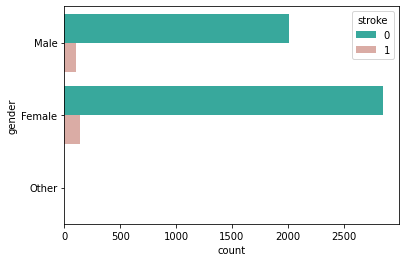

In [333]:
data = data_frame.toPandas()
sns.countplot(y = data['gender'], hue=data['stroke'], palette=('#25BBAA','#e3a59c'))



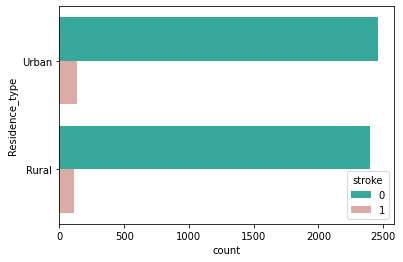

In [334]:
data = data_frame.toPandas()
sns.countplot(y = data['Residence_type'], hue=data['stroke'], palette=('#25BBAA','#e3a59c'))



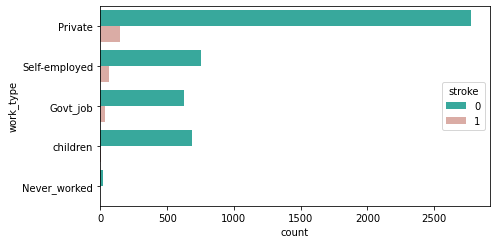

In [360]:
data = data_frame.toPandas()
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
sns.countplot(y = data['work_type'], hue=data['stroke'], palette=('#25BBAA','#e3a59c'))





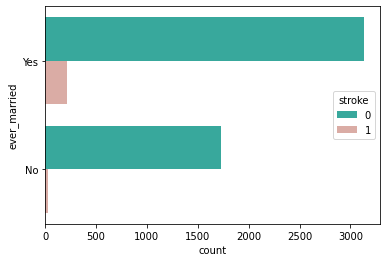

In [350]:
data = data_frame.toPandas()
sns.countplot(y = data['ever_married'], hue=data['stroke'], palette=('#25BBAA','#e3a59c'))
plt.legend(loc='right',  title='stroke')



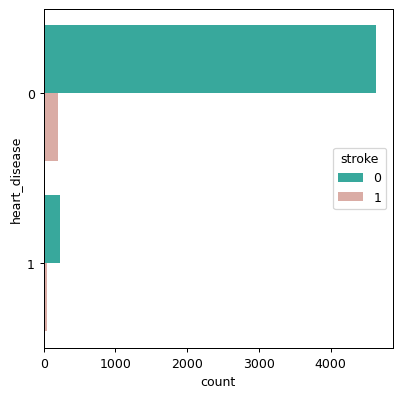

In [349]:
data = data_frame.toPandas()
fig = plt.figure(figsize=(5, 5), dpi=90)
sns.countplot(y = data['heart_disease'], hue=data['stroke'], palette=('#25BBAA','#e3a59c'))
plt.legend(loc='right',  title='stroke')


